# Pokémon Statistical Analysis & Battle Performance Predictor

## Project Overview
This project conducts a comprehensive analysis of Pokémon battle statistics to predict combat effectiveness and identify dominant traits across different species. By examining type advantages, base stats, and legendary status, we uncover insights into optimal team composition and battle strategies.

## Dataset Characteristics
The dataset contains detailed attributes for 800+ Pokémon across multiple generations, including:

- **Basic Attributes**: Name, Pokédex number, generation
- **Type Information**: Primary and secondary types
- **Combat Stats**: HP, Attack, Defense, Special Attack, Special Defense, Speed
- **Classification**: Legendary status, Mega Evolution variants

## Key Analytical Objectives

1. **Type Dominance Analysis**
   - Identify statistically superior Pokémon types
   - Visualize type-based stat distributions
   - Examine common type combinations

2. **Legendary Pokémon Benchmarking**
   - Compare legendary vs non-legendary stat distributions
   - Analyze combat advantage thresholds

3. **Mega Evolution Impact Assessment**
   - Quantify stat improvements from Mega Evolution
   - Compare different Mega variants

4. **Generation Progression Analysis**
   - Track stat inflation across generations
   - Identify meta-changing Pokémon introductions

## Methodology

### Data Processing
- Type normalization and classification
- Stat total calculations
- Generation-based segmentation
- Legendary flagging

### Analytical Techniques
- Multivariate statistical analysis
- Type matchup modeling
- Combat effectiveness scoring
- Cluster analysis for team composition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [2]:
filePath = r'D:\coding\jupiter\Pokemon.csv'
df = pd.read_csv(filePath)
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Pokémon Stats by Type (Heatmap)

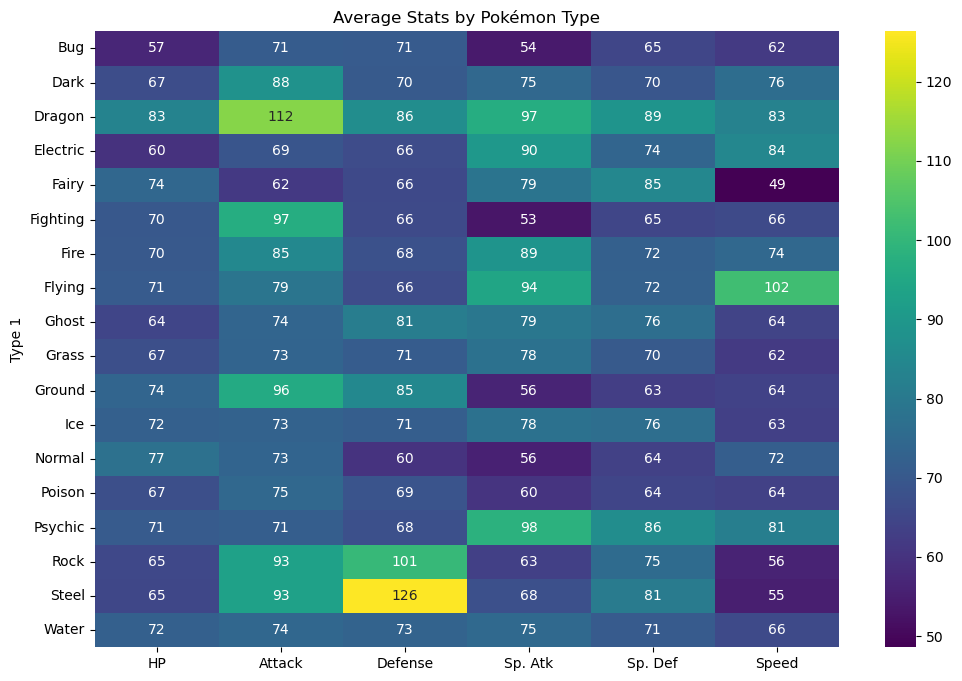

In [16]:
type_stats = df.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(type_stats, annot=True, cmap='viridis', fmt='.0f')
plt.title('Average Stats by Pokémon Type')
plt.show()

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_14732\1119632906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Name', data=top10, palette='Paired')


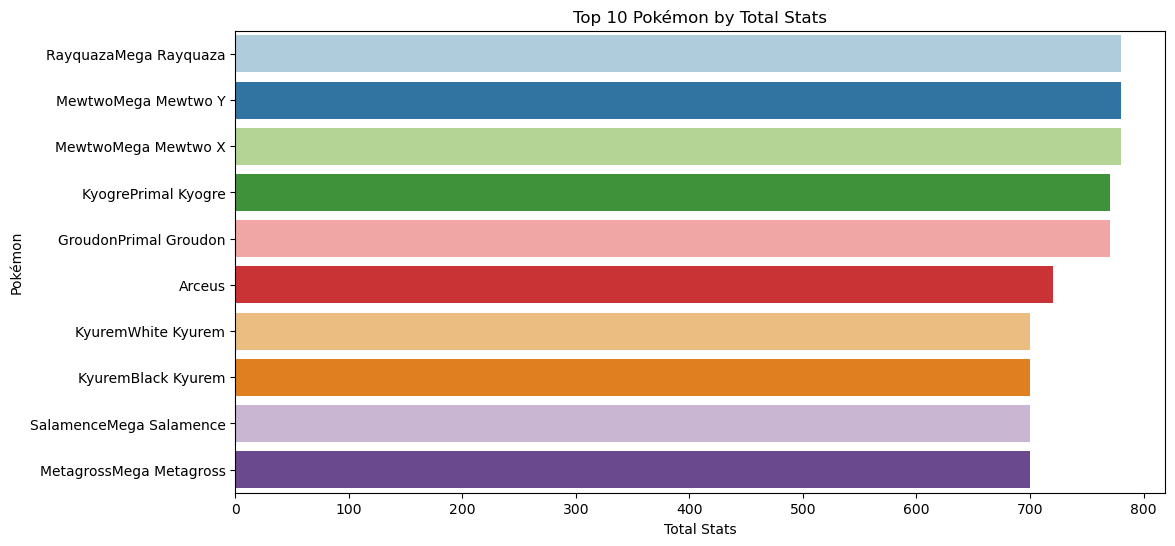

In [14]:
top10 = df[['Name', 'Total']].sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Name', data=top10, palette='Paired')
plt.title('Top 10 Pokémon by Total Stats')
plt.xlabel('Total Stats')
plt.ylabel('Pokémon')
plt.show()

### Legendary vs Non-Legendary (Bar chart)

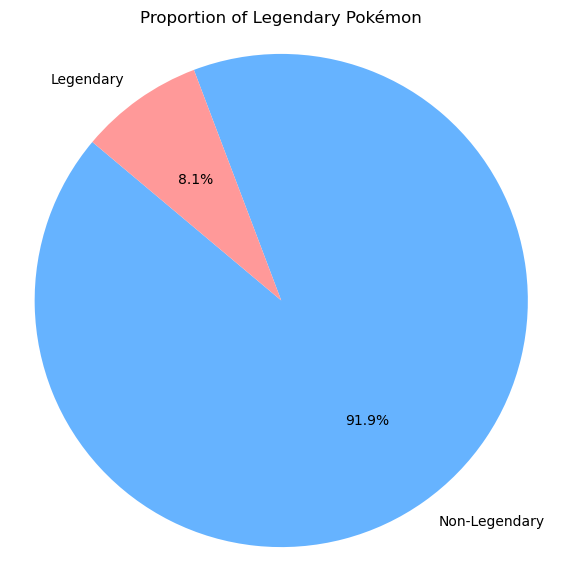

In [17]:
legendary_counts = df['Legendary'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(legendary_counts, labels=['Non-Legendary', 'Legendary'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140)
plt.title('Proportion of Legendary Pokémon')
plt.axis('equal')
plt.show()


### Type Popularity (Bar Chart)

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_14732\51020958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Paired')


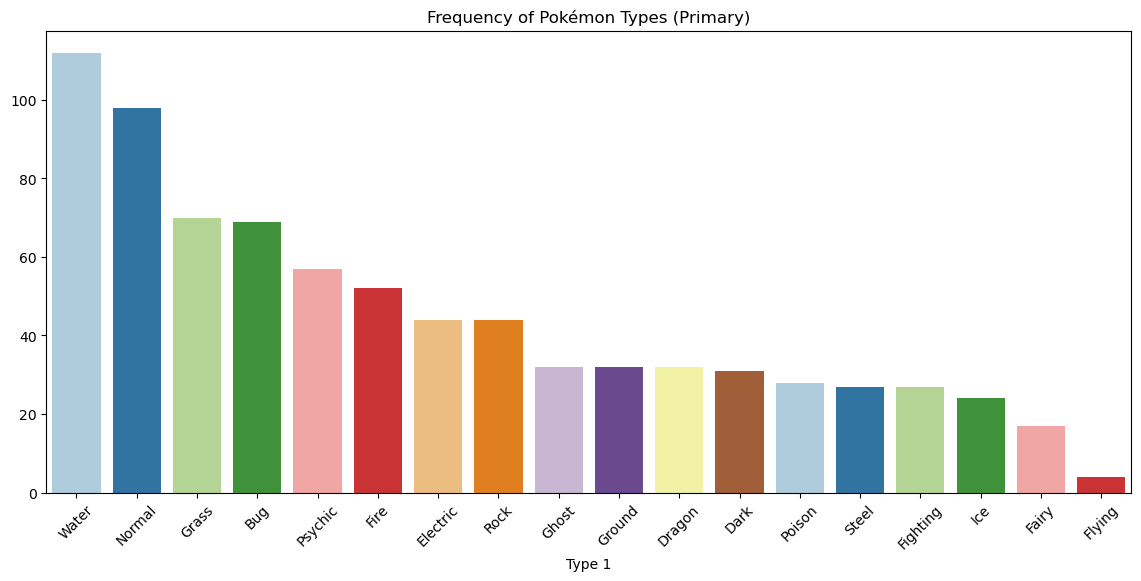

In [20]:
plt.figure(figsize=(14, 6))
type_counts = df['Type 1'].value_counts().sort_values(ascending=False)
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Paired')
plt.xticks(rotation=45)
plt.title('Frequency of Pokémon Types (Primary)')
plt.show()

### Attack Distribution by Generation (Violin Plot)

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_14732\1165059475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Generation', y='Attack', data=df, palette='Pastel1')


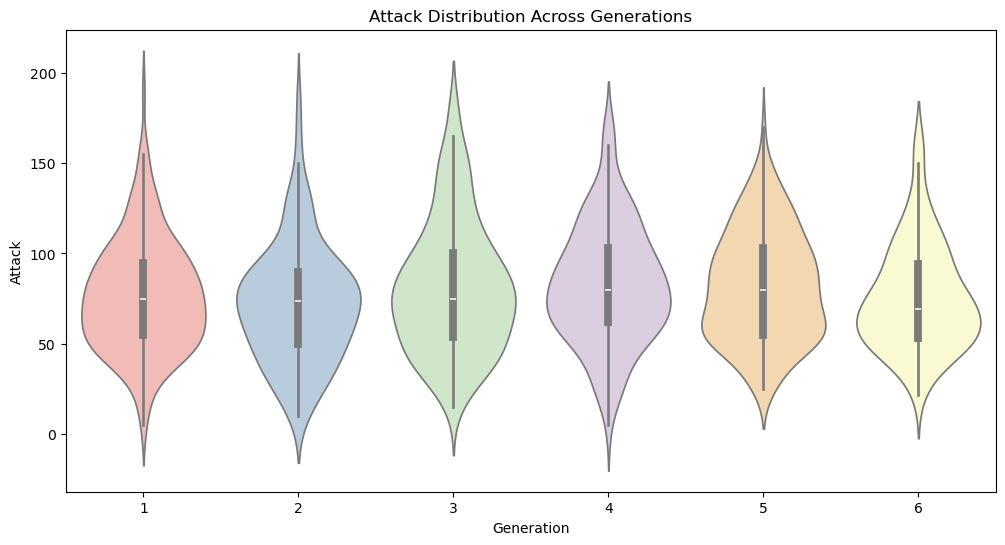

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Generation', y='Attack', data=df, palette='Pastel1')
plt.title('Attack Distribution Across Generations')
plt.xlabel('Generation')
plt.ylabel('Attack')
plt.show()


### Pokémon Special Attack vs. Special Defense by Type (Scatter Chart)

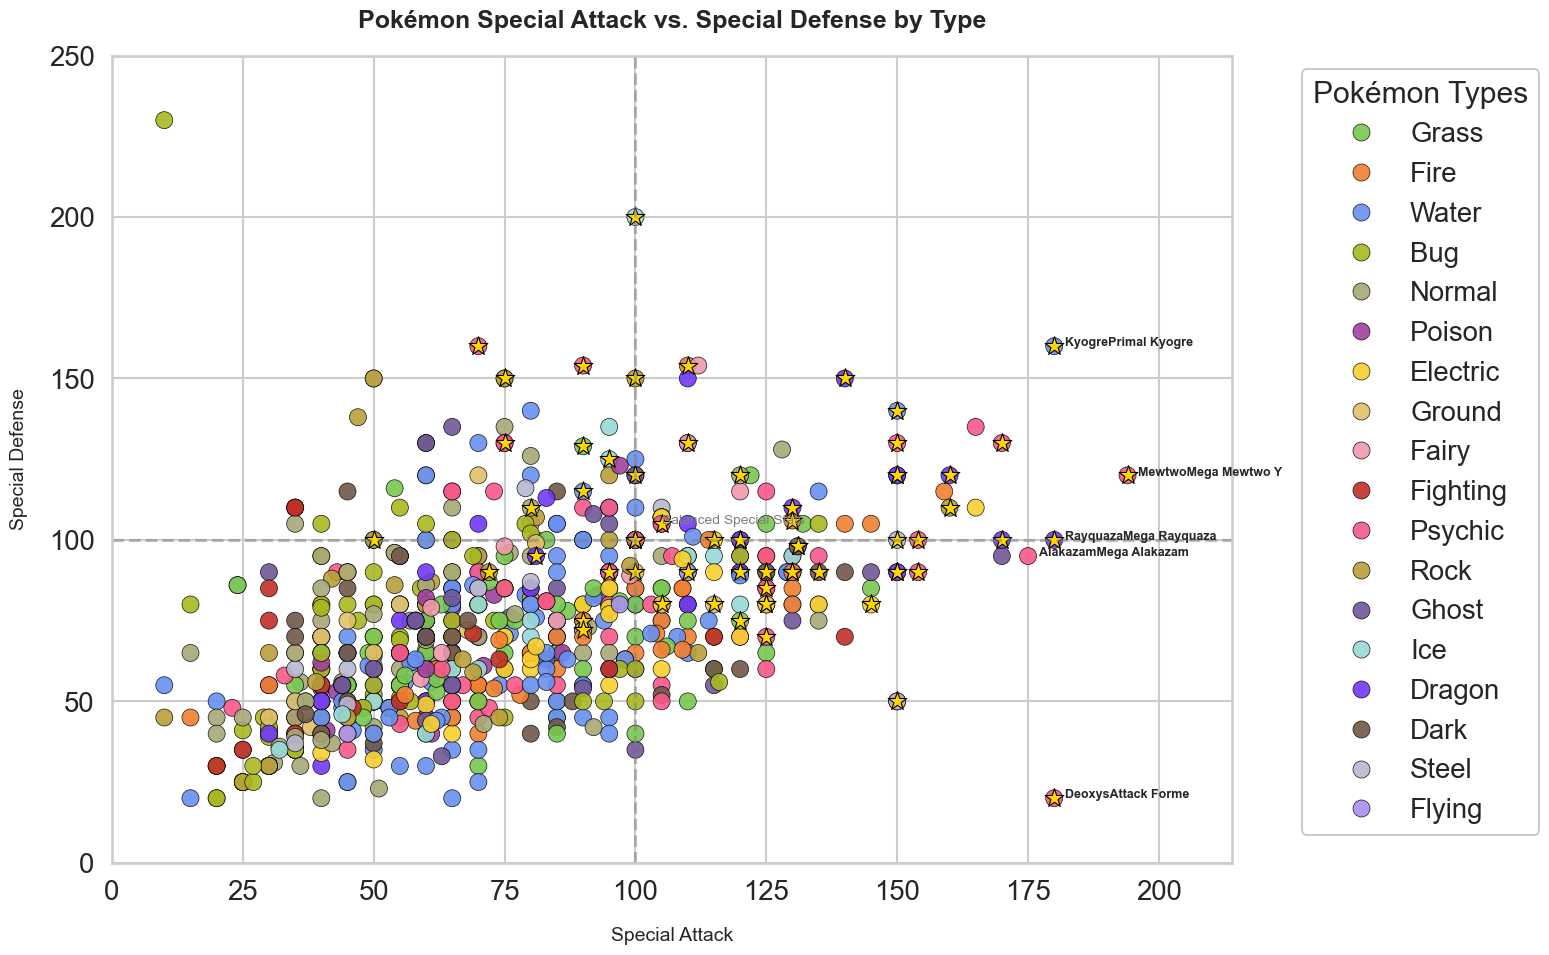

In [26]:
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2) 

# Create custom colormap (18 distinct colors for Pokémon types)
pokemon_colors = ['#78C850', '#F08030', '#6890F0', '#A8B820', '#A8A878', 
                 '#A040A0', '#F8D030', '#E0C068', '#EE99AC', '#C03028',
                 '#F85888', '#B8A038', '#705898', '#98D8D8', '#7038F8',
                 '#705848', '#B8B8D0', '#A890F0']
# cmap = ListedColormap(pokemon_colors)

plt.figure(figsize=(16, 10))

# Enhanced scatter plot
scatter = sns.scatterplot(
    data=df,
    x='Sp. Atk', 
    y='Sp. Def',
    hue='Type 1',
    palette=pokemon_colors,
    s=150,           # Larger points
    alpha=0.9,       # Slight transparency
    edgecolor='black', # Dark borders
    linewidth=0.5
)

# Add annotations for top Pokémon
top_pokemon = df.nlargest(5, 'Sp. Atk')
for i, row in top_pokemon.iterrows():
    plt.annotate(row['Name'], 
                (row['Sp. Atk']+2, row['Sp. Def']),
                fontsize=9,
                fontweight='bold')

# Customize legend
plt.legend(
    title='Pokémon Types',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    framealpha=1
)

# Add reference lines and annotations
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=100, color='gray', linestyle='--', alpha=0.5)
plt.text(105, 105, 'Balanced Special Stats', 
         fontsize=10, color='gray')

# Labels and title
plt.title('Pokémon Special Attack vs. Special Defense by Type', 
          pad=20, fontsize=18, fontweight='bold')
plt.xlabel('Special Attack', labelpad=15, fontsize=14)
plt.ylabel('Special Defense', labelpad=15, fontsize=14)

# Add pokeball markers for legendaries
legendaries = df[df['Legendary']]
plt.scatter(
    legendaries['Sp. Atk'],
    legendaries['Sp. Def'],
    s=200,
    marker='*',
    color='gold',
    edgecolor='black',
    linewidth=0.8,
    label='Legendary'
)

# Final adjustments
plt.xlim(0, df['Sp. Atk'].max()+20)
plt.ylim(0, df['Sp. Def'].max()+20)
plt.tight_layout()

plt.show()

### Mega Evolution Stats (Radar Chart)

- we all know that charizad is Goat of Pokemon 


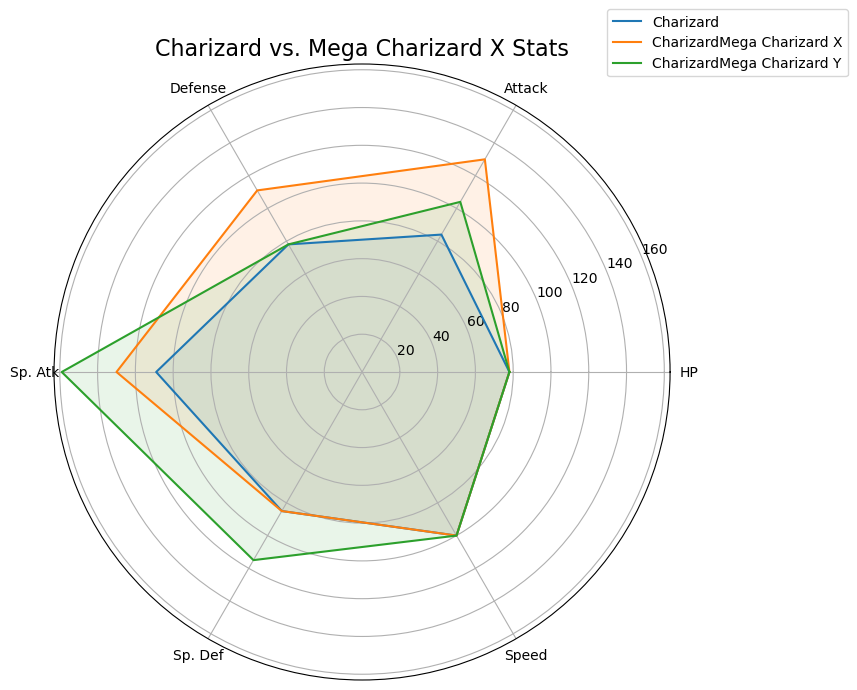

In [24]:
from math import pi
mega_comparison = df[df['Name'].str.contains('Charizard')][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
mega_comparison = mega_comparison.set_index('Name').T

# Radar chart setup
labels = mega_comparison.index
stats = mega_comparison.columns
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]  # complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Plot each Pokémon
for stat in stats:
    values = mega_comparison[stat].tolist()
    values += values[:1]  # complete the circle
    ax.plot(angles, values, label=stat)
    ax.fill(angles, values, alpha=0.1)

# Style
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Charizard vs. Mega Charizard X Stats', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

### Charizard|Venusaur|Blastoise (Radar Chart)

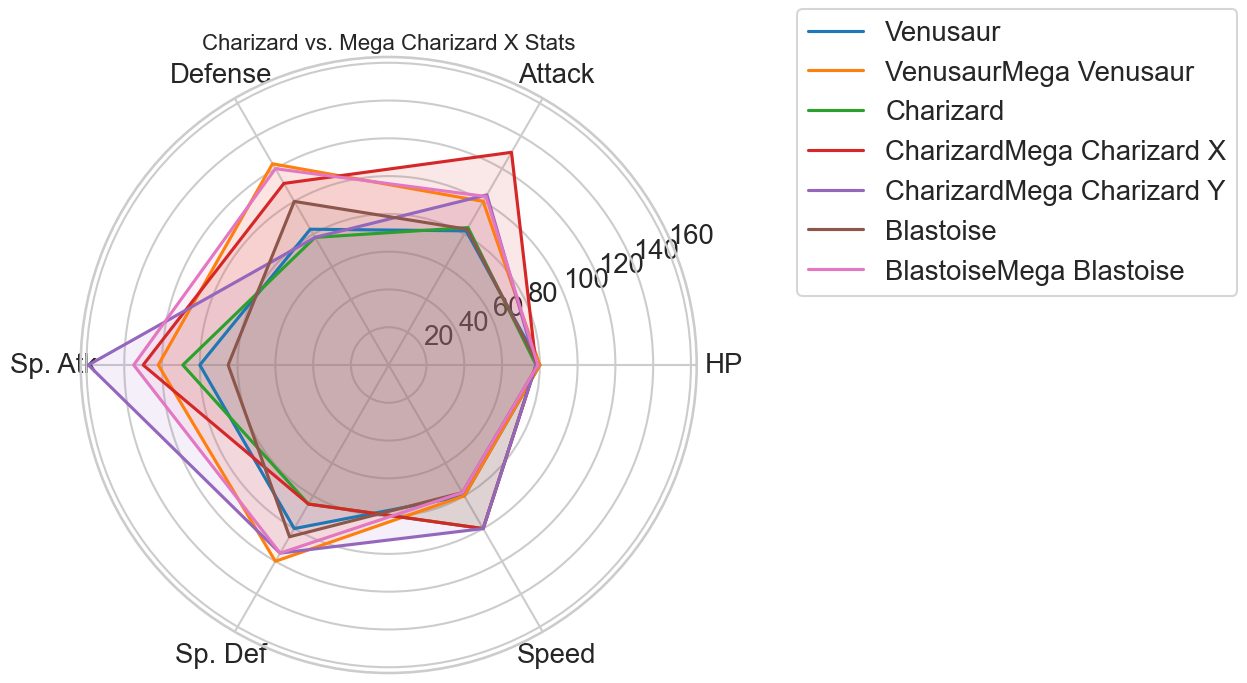

In [30]:


from math import pi
mega_comparison = df[df['Name'].str.contains('Charizard|Venusaur|Blastoise')][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
mega_comparison = mega_comparison.set_index('Name').T

# Radar chart setup
labels = mega_comparison.index
stats = mega_comparison.columns
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]  # complete the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Plot each Pokémon
for stat in stats:
    values = mega_comparison[stat].tolist()
    values += values[:1]  # complete the circle
    ax.plot(angles, values, label=stat)
    ax.fill(angles, values, alpha=0.1)

# Style
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Charizard vs. Mega Charizard X Stats', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1.1))
plt.show()
